In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from scipy import stats
from scipy.stats import norm
from datetime import datetime
from visualization_helper import init_plot_style

In [2]:
init_plot_style()

In [3]:
ds = pd.read_csv('dataset/sampleconv.csv', 
#                  dtype={
#                      'in_reply_to_status_id': object,
#                        },
#                  parse_dates=['timestamp']
                )
ds.shape

(10805, 32)

# Feature extract

In [4]:
from conversation_helper import test_build_content_features
from conversation_helper import build_content_features

In [5]:
ds=ds[ds.in_reply_to_status_id.isnull()]
ds.shape

(2000, 32)

In [6]:
ds=build_content_features(ds)
ds.shape

(2000, 37)

In [7]:
ds.columns

Index(['id', 'screen_name', 'name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'time_zone', 'utc_offset',
       'geo_enabled', 'location', 'description', 'latitude', 'longitude',
       'place_type', 'place_name', 'place_full_name', 'place_country',
       'retweet_count', 'favorite_count', 'retweeted', 'possibly_sensitive',
       'lang', 'in_reply_to_status_id', 'in_reply_to_screen_name',
       'created_at', 'source', 'text', 'media_url', 'hashtags',
       'conversation_id', 'num_child_replies', 'has_media', 'num_urls',
       'num_hashtags', 'num_mentions', 'num_tokens'],
      dtype='object')

In [8]:
dsml = ds[[
    'statuses_count', 
    'followers_count',
    'friends_count',
    'favourites_count',
    'retweet_count',
    'favorite_count',
    'num_child_replies',
    'num_tokens',
    'num_urls',
    'num_hashtags',
    'num_mentions',
    'has_media',
    'in_reply_to_status_id'
    ]]
dsml.shape

(2000, 13)

In [9]:
dsml.columns=[
    'statusescount', 
    'followerscount',
    'friendscount',
    'favouritescount',
    'retweetcount',
    'favoritecount',
    'numreplies',
    'numtokens',
    'numurls',
    'numhashtags',
    'nummentions',
    'hasmedia',
    'inreplytostatusid'
    ]

# Feature Cleansing

In [10]:
dsml.describe()

,statusescount,followerscount,friendscount,favouritescount,retweetcount,favoritecount,numreplies,numtokens,numurls,numhashtags,nummentions,hasmedia,inreplytostatusid
count,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,0.0
mean,3.827474e+04,1.541915e+05,2011.651500,9061.998500,116.308000,260.214500,5.402500,13.679000,0.379500,0.461500,0.524000,0.226000,NaN
std,6.882321e+04,1.262869e+06,11353.740715,22596.435819,1210.061344,2449.386485,21.684248,8.148445,0.496591,1.025204,1.191694,0.418344,NaN
min,2.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.167000e+03,3.065000e+02,225.000000,266.500000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.386550e+04,9.845000e+02,512.500000,1502.500000,0.000000,0.000000,1.500000,13.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,4.086225e+04,7.617000e+03,1062.750000,6957.000000,1.000000,3.000000,3.000000,19.000000,1.000000,1.000000,1.000000,0.000000,NaN
max,1.097590e+06,4.841487e+07,282877.000000,284207.000000,37818.000000,52861.000000,393.000000,68.000000,3.000000,11.000000,10.000000,1.000000,NaN


delete invalid data

In [11]:
dsml=dsml[dsml.statusescount>0]
dsml=dsml[dsml.followerscount>0]
dsml=dsml[dsml.friendscount>0]
dsml.shape

(1994, 13)

verify missing values

In [12]:
dsml.min()

statusescount        2.0
followerscount       1.0
friendscount         2.0
favouritescount      0.0
retweetcount         0.0
favoritecount        0.0
numreplies           1.0
numtokens            0.0
numurls              0.0
numhashtags          0.0
nummentions          0.0
hasmedia             0.0
inreplytostatusid    NaN
dtype: float64

now, there are not missing values. next verify the normality of features prior to do machine learning

# Feature transform

We will ignore features 'retweetcount', 'favoritecount',  'num_child_replies' because all of them could be used as target features to measure the popularity and are not known when a tweet is created, so cannot be used as independent variables for prediction

## user level features

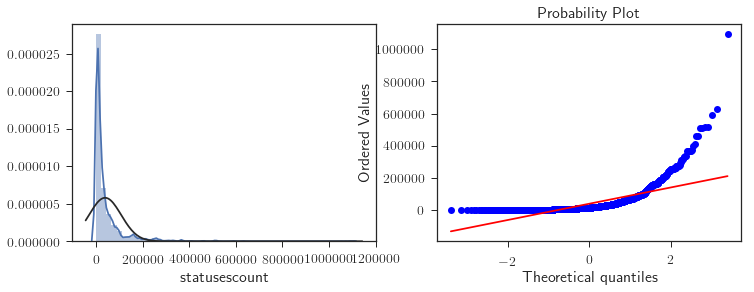

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(dsml['statusescount'], fit=norm);
plt.subplot(1,2,2)
res = stats.probplot(dsml['statusescount'], plot=plt)

looks ugly, lets transform it

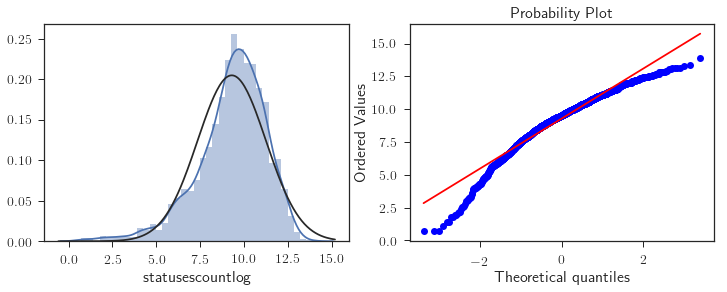

In [14]:
# log transform 
dsml['statusescountlog'] = np.log(dsml['statusescount'])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(dsml['statusescountlog'], fit=norm);
plt.subplot(1,2,2)
res = stats.probplot(dsml['statusescountlog'], plot=plt)

not perfect but better, next

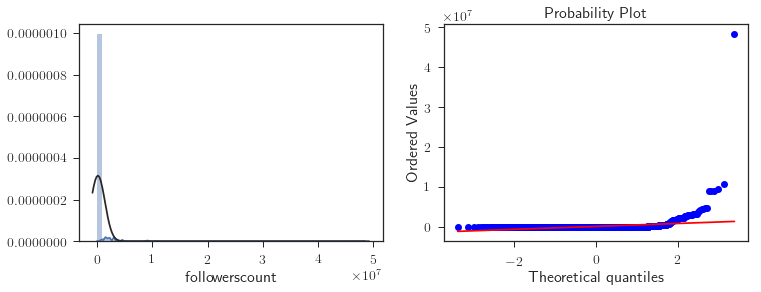

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(dsml['followerscount'], fit=norm);
plt.subplot(1,2,2)
res = stats.probplot(dsml['followerscount'], plot=plt)

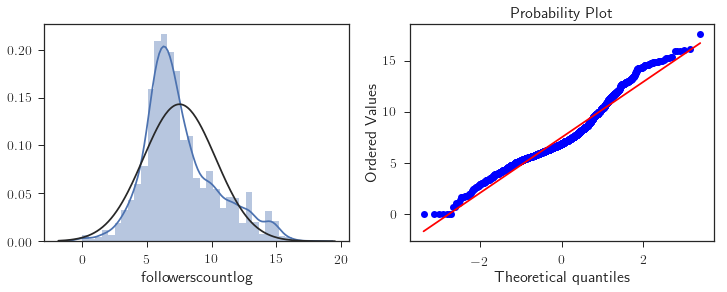

In [16]:
# log transform
dsml['followerscountlog'] = np.log(dsml['followerscount'])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(dsml['followerscountlog'], fit=norm);
plt.subplot(1,2,2)
res = stats.probplot(dsml['followerscountlog'], plot=plt)

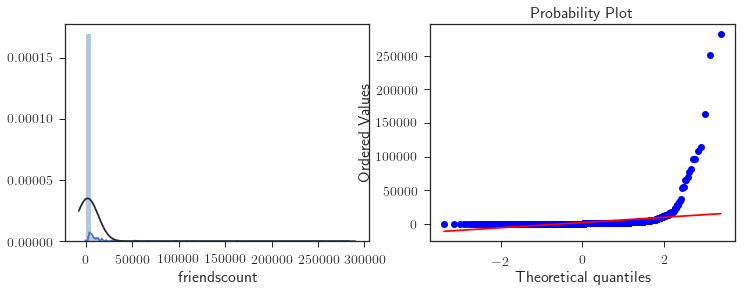

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(dsml['friendscount'], fit=norm);
plt.subplot(1,2,2)
res=stats.probplot(dsml['friendscount'], plot=plt)

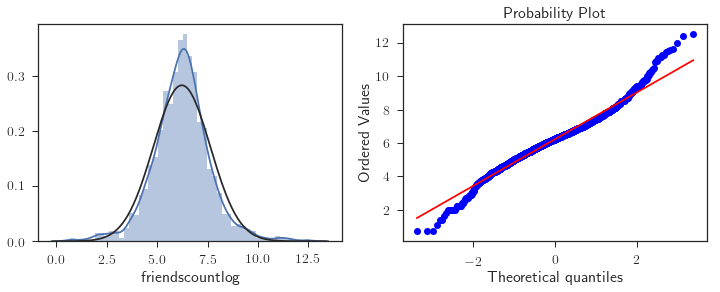

In [18]:
dsml['friendscountlog'] = np.log(dsml['friendscount'])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(dsml['friendscountlog'], fit=norm);
plt.subplot(1,2,2)
res = stats.probplot(dsml['friendscountlog'], plot=plt)

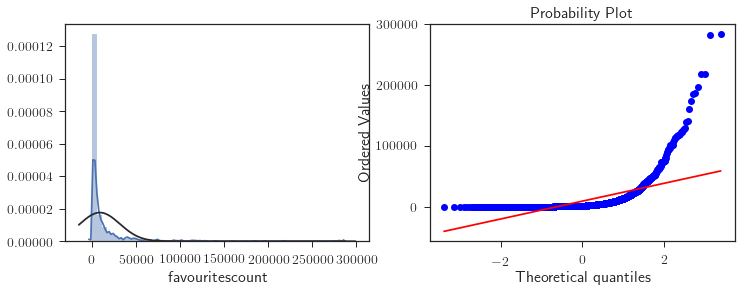

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(dsml['favouritescount'], fit=norm);
plt.subplot(1,2,2)
res=stats.probplot(dsml['favouritescount'], plot=plt)

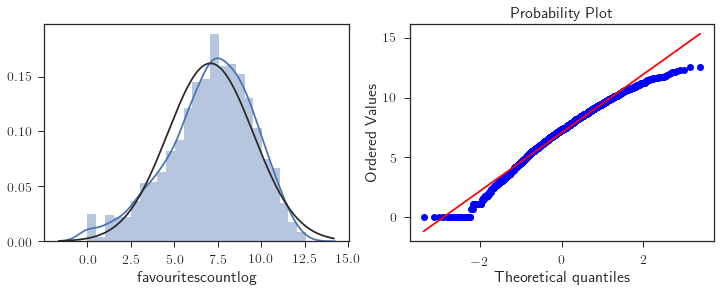

In [20]:
dsml['favouritescountlog'] = np.log(dsml['favouritescount']+1)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(dsml['favouritescountlog'], fit=norm);
plt.subplot(1,2,2)
res = stats.probplot(dsml['favouritescountlog'], plot=plt)

## tweet level features

first analyze num tokens

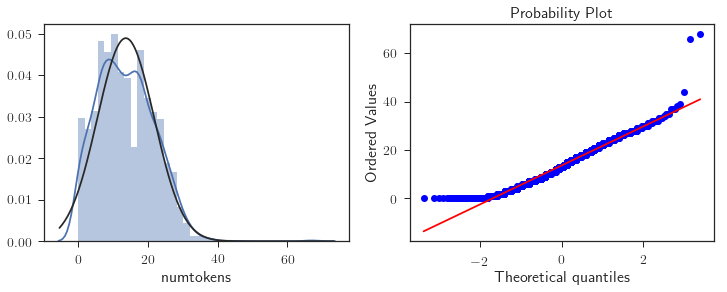

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(dsml['numtokens'], fit=norm);
plt.subplot(1,2,2)
res = stats.probplot(dsml['numtokens'], plot=plt)

seems to be ok

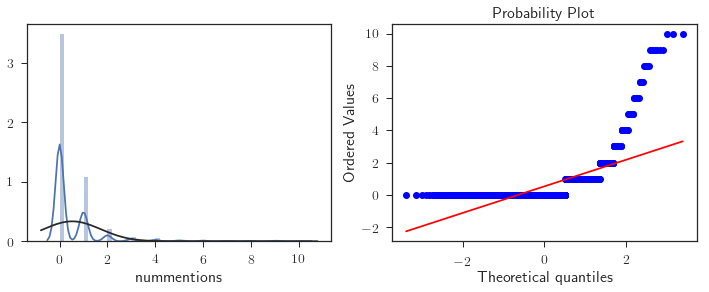

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(dsml['nummentions'], fit=norm);
plt.subplot(1,2,2)
res = stats.probplot(dsml['nummentions'], plot=plt)

because nummentions seems to be categorical so log transformation won't help

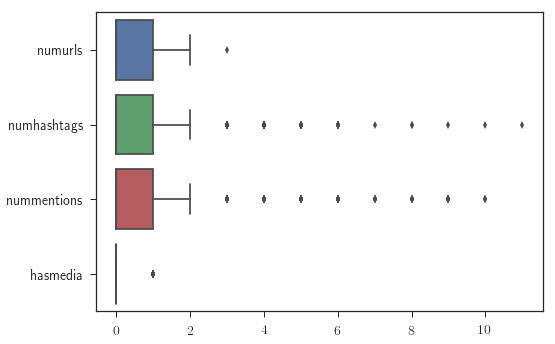

In [23]:
content_features = dsml[
    [
        'numurls', 
        'numhashtags',
        'nummentions',
        'hasmedia'
    ]]
sns.boxplot(data=content_features, orient="h");

for now, we will use categorical features as they are

## target feature

In [24]:
dsml[(dsml.numreplies>1) & (dsml.inreplytostatusid.isnull())].shape

(997, 17)

In [25]:
dsml['sparkconversation'] = 0
dsml.loc[(dsml.numreplies>1) & (dsml.inreplytostatusid.isnull()), 'sparkconversation']=1
dsml.groupby('sparkconversation').size()
target=dsml['sparkconversation']
target.value_counts()

1    997
0    997
Name: sparkconversation, dtype: int64

# Feature Selection

In [26]:
features = dsml[[    
        'favouritescount',        
        'followerscount',
        'friendscount',
        'statusescount',
    
        # tweet level features
        'numtokens',
        'numurls',
        'numhashtags',
        'nummentions',
        'hasmedia',
    
        # target variable
        'sparkconversation',
    ]]
features.shape

(1994, 10)

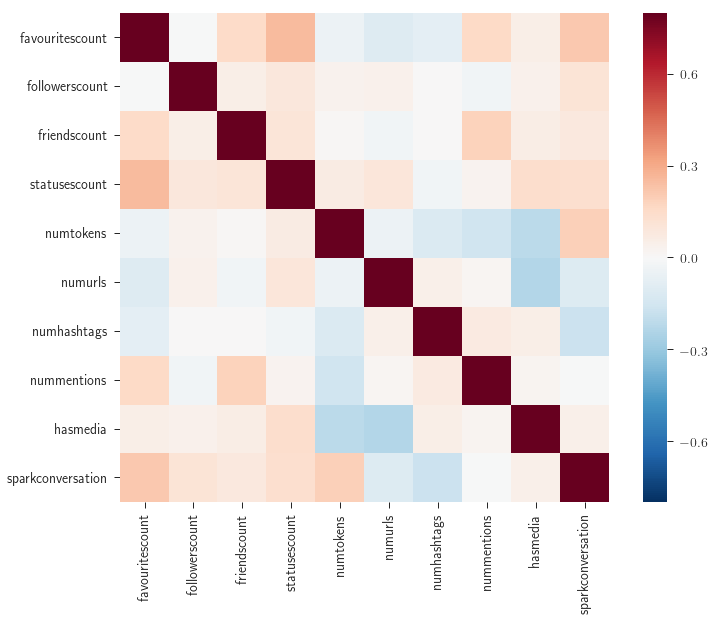

In [93]:
corrmat = features.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [94]:
# #saleprice correlation matrix
# k = 10 #number of variables for heatmap
# cols = corrmat.nlargest(k, 'sparkconversation')['sparkconversation'].index
# cm = np.corrcoef(features[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

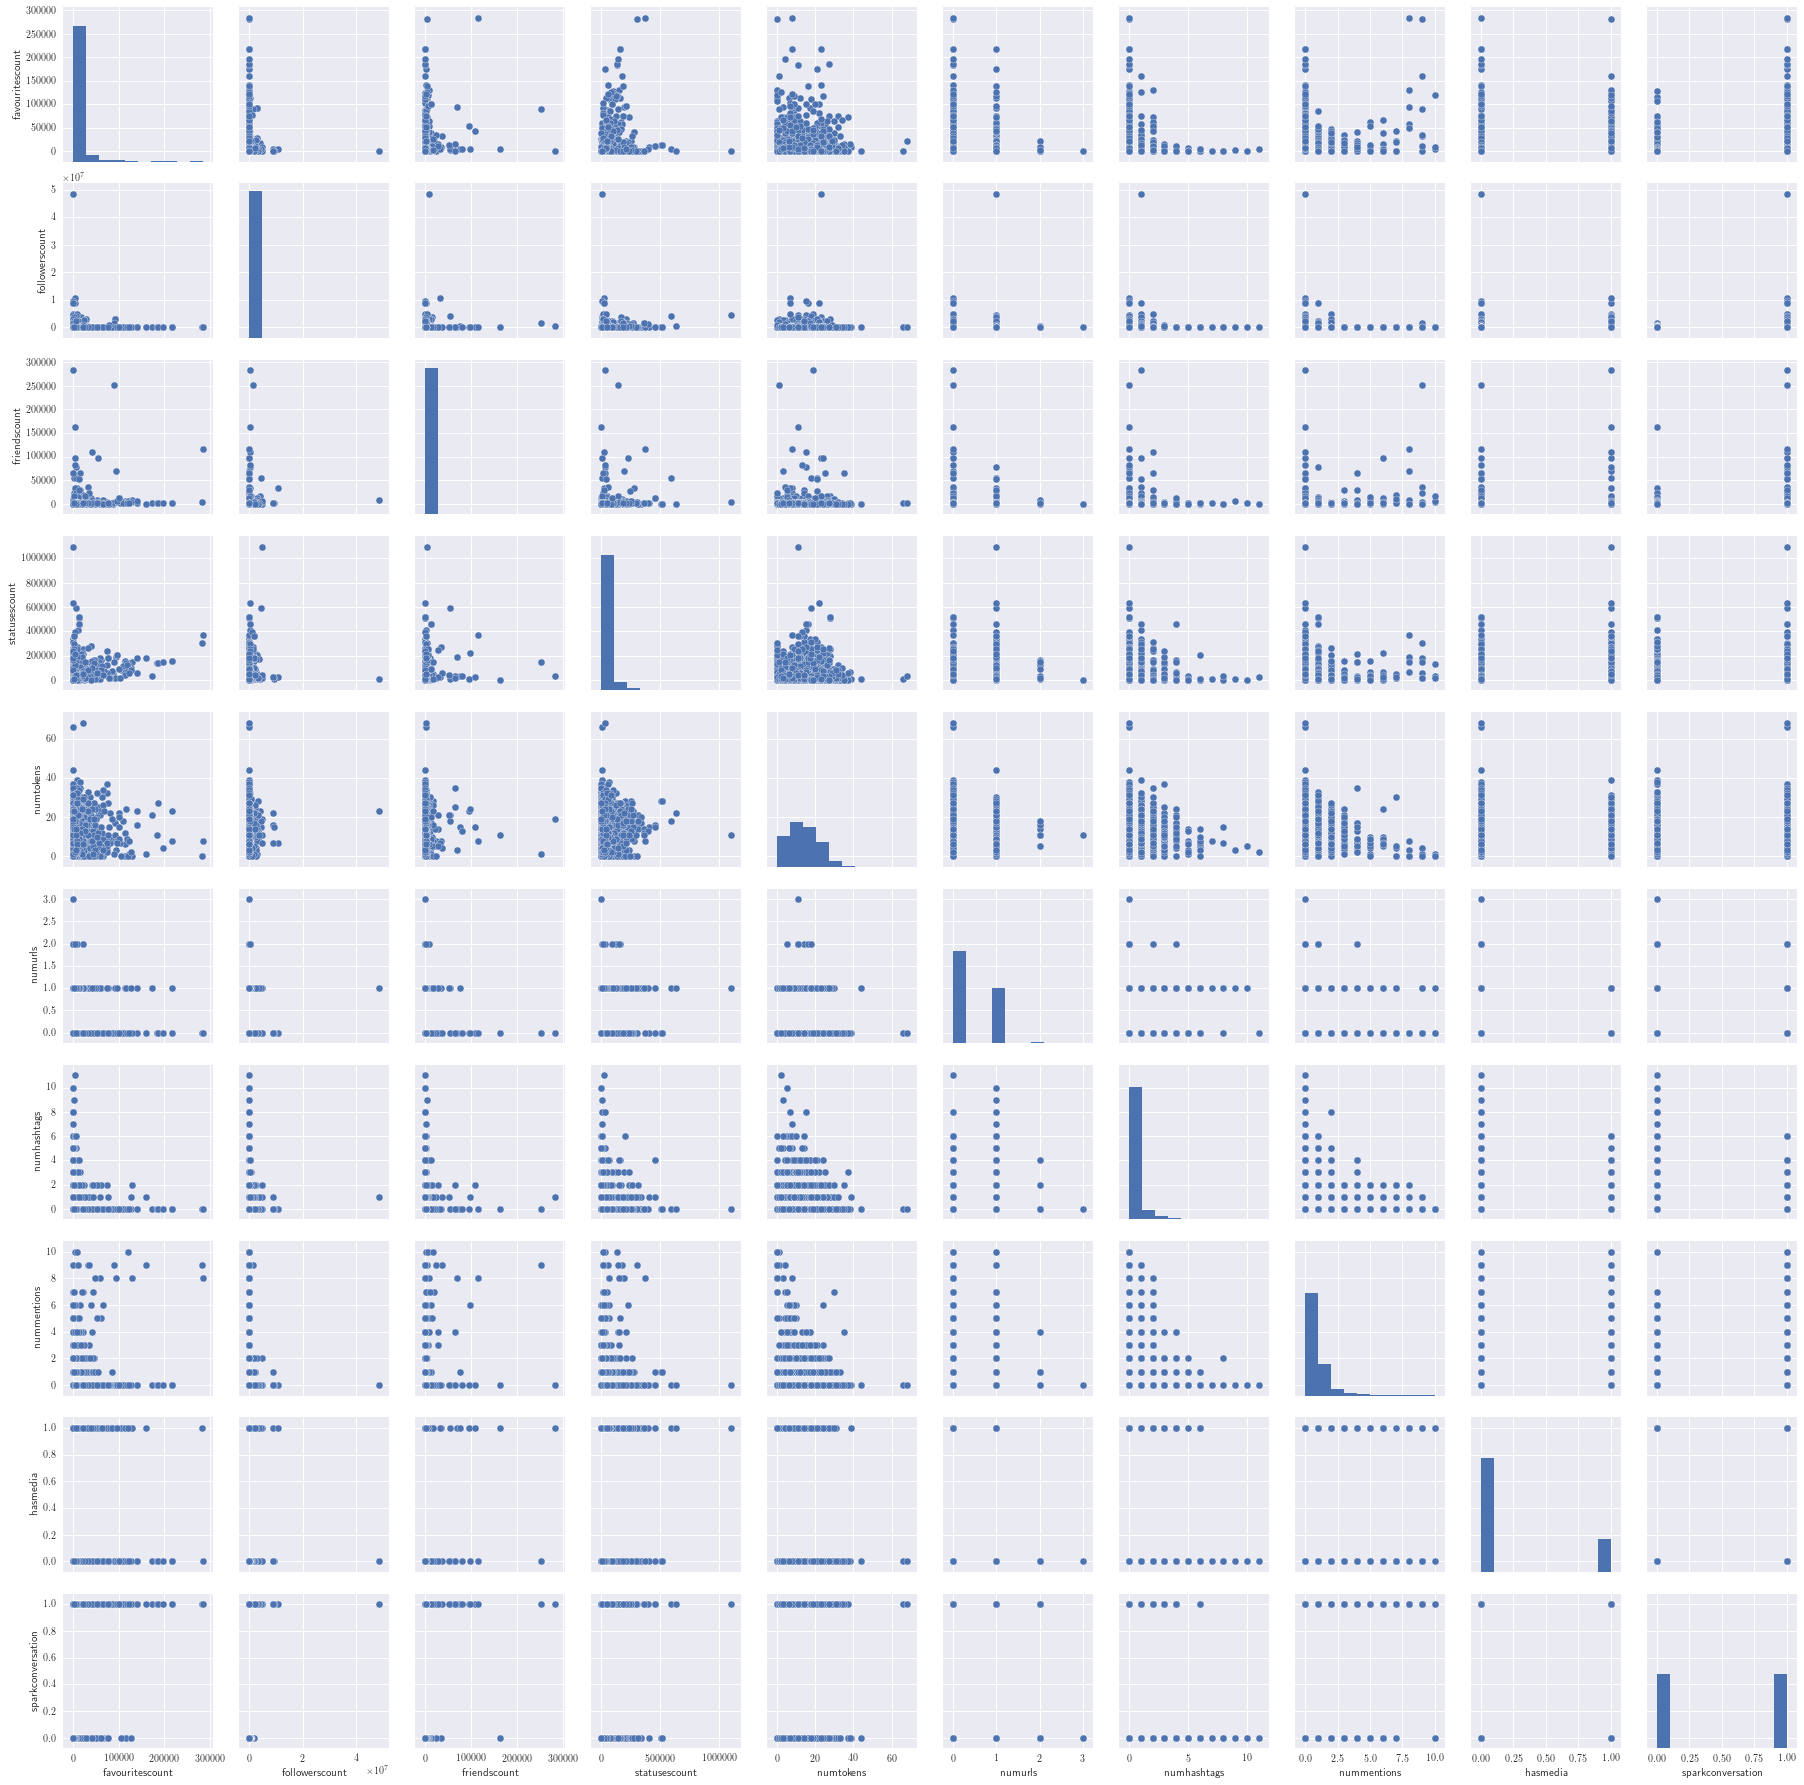

In [95]:
sns.set()
sns.pairplot(features, size = 2.5)

In [27]:
features = dsml[[
        # user level features
        'favouritescountlog',        
        'followerscountlog',
        'friendscountlog',
        'statusescountlog',
        
        # tweet level features
        'numtokens',
        'numurls',
        'numhashtags',
        'nummentions',
        'hasmedia',
    ]]
features.shape

(1994, 9)

# Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler, RobustScaler
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(features)
X.shape

(1994, 9)

# PCA

In [29]:
from sklearn import decomposition
num_features = X.shape[1]
pca = decomposition.PCA(n_components=num_features)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [99]:
pcafactors=pd.DataFrame({
    'Factor': range(1,num_features+1,1),
    'Eigenvalue' : pca.explained_variance_,
    'Variance': pca.explained_variance_ratio_,
    'CumVariance' : np.cumsum(pca.explained_variance_ratio_),
})
pcafactors=pcafactors[['Factor','Eigenvalue','Variance','CumVariance']]
pcafactors.to_csv('results/pca_factors.csv', index=False)
pcafactors

,Factor,Eigenvalue,Variance,CumVariance
0,1,1.711172,0.274133,0.274133
1,2,1.467731,0.235133,0.509266
2,3,1.021443,0.163637,0.672904
3,4,0.538389,0.086251,0.759155
4,5,0.487356,0.078075,0.837230
5,6,0.420231,0.067322,0.904552
6,7,0.270539,0.043341,0.947893
7,8,0.207785,0.033288,0.981180
8,9,0.117475,0.018820,1.000000


## scree test

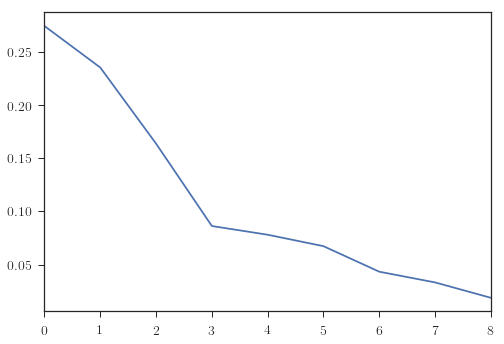

In [100]:
init_plot_style()
pcafactors.Variance.plot()

In [101]:
features.columns

Index(['favouritescountlog', 'followerscountlog', 'friendscountlog',
       'statusescountlog', 'numtokens', 'numurls', 'numhashtags',
       'nummentions', 'hasmedia'],
      dtype='object')

In [102]:
feat_names =['fav given', 'followers', 'friends',
       'statuses', 'tokens', 'urls', 'hashtags',
       'mentions', 'media']

# feat_names =['numtokens', 'urls', 'hashtags',
#        'mentions']

factors  = pd.DataFrame({
    'Feature' : feat_names,
    'Factor1' : pca.components_[0],
    'Factor2' : pca.components_[1],
    'Factor3' : pca.components_[2],
})
factors=factors[['Feature', 'Factor1', 'Factor2', 'Factor3']]
factors.to_csv('results/factors_loadings.csv', index=False)
factors

,Feature,Factor1,Factor2,Factor3
0,fav given,0.345456,-0.085414,-0.078044
1,followers,0.499398,-0.195790,0.123833
2,friends,0.522355,-0.010749,0.066228
3,statuses,0.528572,-0.198172,0.039483
4,tokens,0.038991,-0.166878,-0.055314
5,urls,0.022441,0.007194,0.043542
6,hashtags,-0.024901,0.247076,0.953131
7,mentions,0.274970,0.908823,-0.241202
8,media,0.027688,0.008845,0.032192


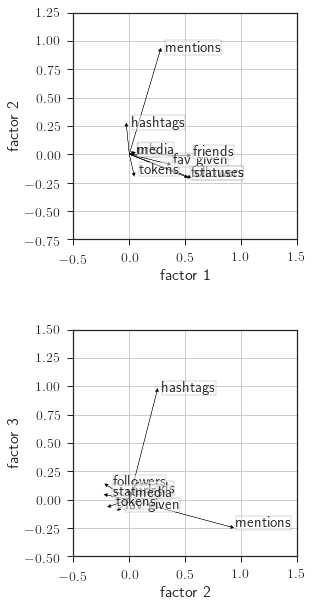

In [103]:
matplotlib.rcParams.update({'font.size': 14})

plt.figure(figsize=(4,10))

plt.subplot(2,1,1)
for i,r in factors.iterrows():
    plt.arrow(0, 0, r['Factor1'], r['Factor2'],head_width=0.03, head_length=0.03, fc='k', ec='k')
    plt.text(r['Factor1']+0.05, r['Factor2'], r['Feature'],size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':0.5})

plt.xlim(-0.5, 1.5)
plt.ylim(-0.75, 1.25)
plt.xlabel('factor 1')
plt.ylabel('factor 2')
#plt.grid(b=True, which='major')
plt.grid()

plt.subplots_adjust(hspace=0.4)

plt.subplot(2,1,2)
for i,r in factors.iterrows():
    plt.arrow(0, 0, r['Factor2'], r['Factor3'],head_width=0.03, head_length=0.03, fc='k', ec='k')
    plt.text(r['Factor2']+0.05, r['Factor3'], r['Feature'], size=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':0.5})

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('factor 2')
plt.ylabel('factor 3')
#plt.grid(b=True, which='major')
plt.grid()

plt.savefig('results/factors_mapping.eps', format='eps' , bbox_inches='tight')

In [104]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# soa = np.array([[0, 0, 1, 1, -2, 0], [0, 0, 2, 1, 1, 0],
#                 [0, 0, 3, 2, 1, 0], [0, 0, 4, 0.5, 0.7, 0]])

# X, Y, Z, U, V, W = zip(*soa)

In [105]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.quiver(X, Y, Z, U, V, W)
# ax.set_xlim([-1, 0.5])
# ax.set_ylim([-1, 1.5])
# ax.set_zlim([-1, 8])
# plt.show()

In [30]:
X_r = pca.transform(X)
#X_r = X_r[:,0:2]
X_r.shape

(1994, 9)

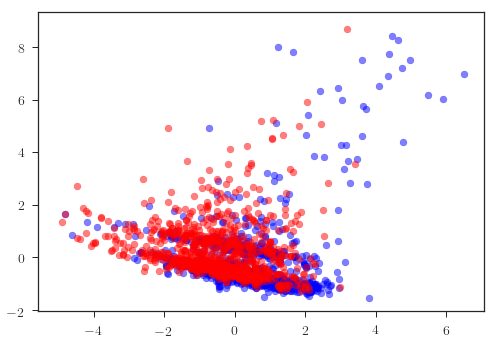

In [31]:
#plt.subplot(121)
plt.scatter(X_r[target==1,0], X_r[target==1,1], color='b',alpha=0.5)
#plt.subplot(122)
plt.scatter(X_r[target==0,0], X_r[target==0,1], color='r',alpha=0.5)

# Predictive model

In [108]:
target.unique()


array([0, 1])

In [109]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X_r, target, test_size=0.8, random_state=0, stratify=target)

Xtrain.shape, ytrain.shape

((398, 9), (398,))

In [110]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
est=logistic.fit(Xtrain, ytrain)

In [111]:
logistic.score(Xtest,ytest)

0.70300751879699253

In [112]:
import statsmodels.api as sm
X2 = sm.add_constant(Xtrain)
est = sm.Logit(ytrain, X2)
est = est.fit()

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.546976
         Iterations 6


In [113]:
summary = est.summary()
tbl=summary.tables[1]
#dir(tbl)
tbl

# col_names = tbl.data[0]
# col_names[0] = 'feat'
# coef_ds = pd.DataFrame(tbl.data[1:], columns=col_names)
# del coef_ds['feat']
# row_names = ['intercept']+feat_names
# coef_ds.insert(0,'feat',row_names)
# coef_ds = coef_ds[['feat','coef','std err','z','P>|z|']]
# #coef_ds.to_csv('results/prediction_coef.csv', index=False)
# coef_ds


,coef,std err,z,P>|z|,[0.025,0.975]
const,-0.0979,0.120,-0.819,0.413,-0.332,0.136
x1,0.7799,0.111,7.006,0.000,0.562,0.998
x2,-0.4789,0.105,-4.572,0.000,-0.684,-0.274
x3,-0.6583,0.191,-3.439,0.001,-1.034,-0.283
x4,0.6015,0.172,3.501,0.000,0.265,0.938
x5,0.2015,0.171,1.175,0.240,-0.135,0.538
x6,0.2638,0.189,1.399,0.162,-0.106,0.633
x7,-0.7197,0.234,-3.079,0.002,-1.178,-0.262
x8,0.4284,0.278,1.542,0.123,-0.116,0.973
x9,0.5516,0.346,1.595,0.111,-0.126,1.229


In [114]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logistic, Xtrain, ytrain, cv=10, scoring='f1')
scores

array([ 0.61904762,  0.68292683,  0.7       ,  0.68292683,  0.7027027 ,
        0.68421053,  0.76190476,  0.76190476,  0.78947368,  0.76470588])

In [115]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.71 (+/- 0.10)


In [116]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import permutation_test_score

# cv = StratifiedKFold()

# X, y, groups = indexable(X, y, groups)

# cv = check_cv(cv, y, classifier=is_classifier(estimator))
# scorer = check_scoring(estimator, scoring=scoring)
# random_state = check_random_state(random_state)

# # We clone the estimator to make sure that all the folds are
# # independent, and that it is pickle-able.
# score = _permutation_test_score(clone(estimator), X, y, groups, cv, scorer)
# permutation_scores = Parallel(n_jobs=n_jobs, verbose=verbose)(
#     delayed(_permutation_test_score)(
#         clone(estimator), X, _shuffle(y, groups, random_state),
#         groups, cv, scorer)
#     for _ in range(n_permutations))


#     avg_score = []
#     for train, test in cv.split(X, y, groups):
#         X_train, y_train = _safe_split(estimator, X, y, train)
#         X_test, y_test = _safe_split(estimator, X, y, test, train)
#         estimator.fit(X_train, y_train)
#         avg_score.append(scorer(estimator, X_test, y_test))
#     return np.mean(avg_score)

# permutation_scores = np.array(permutation_scores)
# pvalue = (np.sum(permutation_scores >= score) + 1.0) / (n_permutations + 1)

In [117]:
# logistic = linear_model.LogisticRegression()

# score, permutation_scores, pvalue = permutation_test_score(
#     logistic, X, y, verbose=True)

# print("Classification score %s (pvalue : %s)" % (score, pvalue))

In [118]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X_r[:,0:2], target, test_size=0.9, random_state=0, stratify=target)

Xtrain.shape, ytrain.shape

((199, 2), (199,))

In [119]:
content_features = dsml[[
        # user level features
#         'favouritescountlog',        
#         'followerscountlog',
#         'friendscountlog',
#         'statusescountlog',
        
        # tweet level features
        'numtokens',
        'numurls',
        'numhashtags',
        'nummentions',
        'hasmedia',
    ]]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_content = robust_scaler.fit_transform(content_features)
from sklearn import decomposition
num_features = X_content.shape[1]
pca = decomposition.PCA(n_components=num_features)
X_content = pca.fit_transform(X_content)
X_content=X_content[:,0:2]


from sklearn.model_selection import train_test_split
Xctrain, Xctest, yctrain, yctest = train_test_split(
    X_content, target, test_size=0.9, random_state=0, stratify=target)

Xctrain.shape, yctrain.shape

((199, 2), (199,))

dataset: 0, model: Logistic
dataset: 0, model: RBF SVM
dataset: 0, model: Gaussian Process
dataset: 0, model: Neural Net
dataset: 0, model: Naive Bayes
dataset: 1, model: Logistic
dataset: 1, model: RBF SVM
dataset: 1, model: Gaussian Process
dataset: 1, model: Neural Net
dataset: 1, model: Naive Bayes


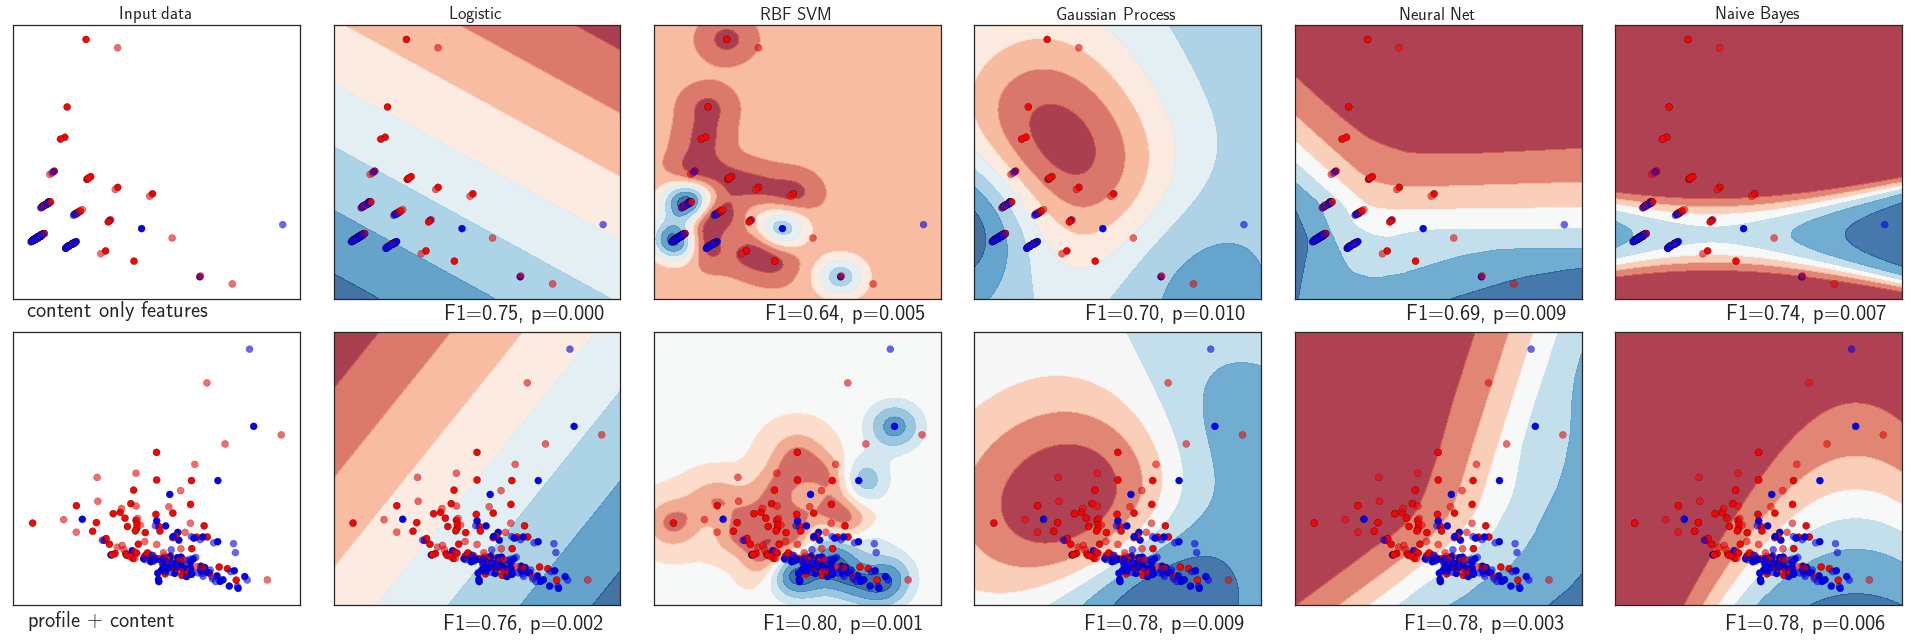

In [120]:
matplotlib.style.use('seaborn-ticks')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['axes.titlesize'] = 18
    
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = [#"Nearest Neighbors", 
         #"Linear SVM", 
        "Logistic", 
         "RBF SVM",
         "Gaussian Process",
         #"Decision Tree", 
         #"Random Forest", 
         "Neural Net", 
         #"AdaBoost",
         "Naive Bayes", 
         #"QDA"
        ]

classifiers = [
    #KNeighborsClassifier(3),
    #SVC(kernel="linear", C=0.025),
    linear_model.LogisticRegression(),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    #DecisionTreeClassifier(max_depth=5),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    #AdaBoostClassifier(),
    GaussianNB(),
    #QuadraticDiscriminantAnalysis()
]

#X, y = X_train, y_train
#rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
ds_names = ['content only features', 'profile + content']
ds_content = (Xctrain, yctrain)
ds_all = (Xtrain, ytrain)


datasets = [ds_content,
            ds_all
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.min() + .4, yy.min() - .6, ds_names[ds_cnt],
                size=22, horizontalalignment='left')
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f'dataset: {ds_cnt}, model: {name}')

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .4, yy.min() - .7, ('F1=%.2f, p=%.3f' % (score, 0.01*np.random.rand())).lstrip('0'),
                size=22, horizontalalignment='right')
        i += 1

plt.tight_layout()
#plt.show()
plt.savefig('results/classif_score.eps', format='eps')

In [121]:
print('F1=%.2f, p=%.3f' % (score, 0.01*np.random.rand()))

F1=0.78, p=0.006


In [122]:
np.percentile(features.followerscountlog, 75)

8.9285326916354002

In [32]:

def predict_percentile(X_percentile, y_percentile):
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import RobustScaler
    from sklearn import decomposition
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    from sklearn.model_selection import cross_val_score

    robust_scaler = RobustScaler()
    X_percentile = robust_scaler.fit_transform(X_percentile)

    num_features = X_percentile.shape[1]
    pca = decomposition.PCA(n_components=num_features)
    X_percentile = pca.fit_transform(X_percentile)
    #X_content=X_content[:,0:2]

    X_ptrain, X_ptest, y_ptrain, y_ptest = train_test_split(
        X_percentile, y_percentile, test_size=0.4, random_state=0, stratify=y_percentile)

    logistic = linear_model.LogisticRegression()
    #est=logistic.fit(X_ptrain, y_ptrain)

    scores = cross_val_score(logistic, X_ptrain, y_ptrain, cv=10)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    return scores.mean(), scores.std()* 2

yvals = []
yerrs = []
xvals =[]

percentile25=np.percentile(features.followerscountlog, 10)
percentile50=np.percentile(features.followerscountlog, 50)
percentile75=np.percentile(features.followerscountlog, 90)

ix =features.followerscountlog<percentile25
X_percentile = features[ix]
y_percentile = target[ix]
score, err = predict_percentile(X_percentile, y_percentile)
xvals.append(1)
yvals.append(score)
yerrs.append(err)

ix=(features.followerscountlog>percentile25)&(features.followerscountlog<percentile75)
X_percentile = features[ix]
y_percentile = target[ix]
score, err = predict_percentile(X_percentile, y_percentile)
xvals.append(5)
yvals.append(score)
yerrs.append(err)

ix=features.followerscountlog>percentile75
X_percentile = features[ix]
y_percentile = target[ix]
score, err = predict_percentile(X_percentile, y_percentile)
xvals.append(9)
yvals.append(score)
yerrs.append(err)


yvals2 = []
yerrs2 = []
xvals2 =[]

percentile25=np.percentile(features.favouritescountlog, 10)
percentile50=np.percentile(features.favouritescountlog, 50)
percentile75=np.percentile(features.favouritescountlog, 90)

ix =features.favouritescountlog<percentile25
X_percentile = features[ix]
y_percentile = target[ix]
score, err = predict_percentile(X_percentile, y_percentile)
xvals2.append(2)
yvals2.append(score)
yerrs2.append(err)

ix=(features.favouritescountlog>percentile25)&(features.favouritescountlog<percentile75)
X_percentile = features[ix]
y_percentile = target[ix]
score, err = predict_percentile(X_percentile, y_percentile)
xvals2.append(6)
yvals2.append(score)
yerrs2.append(err)

ix=features.favouritescountlog>percentile75
X_percentile = features[ix]
y_percentile = target[ix]
score, err = predict_percentile(X_percentile, y_percentile)
xvals2.append(10)
yvals2.append(score)
yerrs2.append(err)


yvals3 = []
yerrs3 = []
xvals3 =[]

percentile25=np.percentile(features.numtokens, 10)
percentile50=np.percentile(features.numtokens, 50)
percentile75=np.percentile(features.numtokens, 90)

ix =features.numtokens<percentile25
X_percentile = features[ix]
y_percentile = target[ix]
score, err = predict_percentile(X_percentile, y_percentile)
xvals3.append(3)
yvals3.append(score)
yerrs3.append(err)

ix=(features.numtokens>percentile25)&(features.numtokens<percentile75)
X_percentile = features[ix]
y_percentile = target[ix]
score, err = predict_percentile(X_percentile, y_percentile)
xvals3.append(7)
yvals3.append(score)
yerrs3.append(err)

ix=features.numtokens>percentile75
X_percentile = features[ix]
y_percentile = target[ix]
score, err = predict_percentile(X_percentile, y_percentile)
xvals3.append(11)
yvals3.append(score)
yerrs3.append(err)


Accuracy: 0.78 (+/- 0.16)
Accuracy: 0.67 (+/- 0.16)
Accuracy: 0.80 (+/- 0.13)
Accuracy: 0.76 (+/- 0.28)
Accuracy: 0.72 (+/- 0.05)
Accuracy: 0.79 (+/- 0.18)
Accuracy: 0.79 (+/- 0.25)
Accuracy: 0.71 (+/- 0.08)
Accuracy: 0.77 (+/- 0.24)


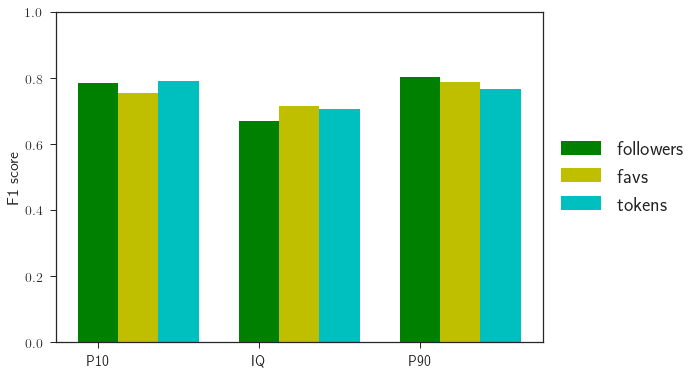

In [33]:
init_plot_style()
matplotlib.rcParams['legend.fontsize'] = 20
width = 1
plt.bar(xvals, yvals, width=width,color='g')
plt.bar(xvals2, yvals2,  width=width,color='y')
plt.bar(xvals3, yvals3,  width=width,color='c')
#plt.errorbar(xvals2, yvals2, yerr=yerrs2, fmt='--o', ecolor='r', capthick=2)
plt.ylim([0, 1])
plt.ylabel('F1 score')
plt.xticks([1,5,9], ['P10', 'IQ', 'P90'])
plt.legend(['followers', 'favs', 'tokens'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('results/class_perc.eps', format='eps', bbox_inches='tight')